<center>Trabajo Etapa de Transferencia</center>
<p>
    <center>
Sindy Viviana Joya Varila, Karen Javiana López Lobon,<br>
Sergio Andrés Alvarado Tuta, Oscar 
Osvaldo Lancheros Romero <br>
Fundación Universitaria Compensar<br>
Estadística Descriptiva<br>
Profesora: Esperanza Rodríguez Carmona
<br><br>
Abril 03 de 2024<br>
    </center>
</p>

#### Objetivo:
Aplicar los conocimientos adquiridos durante el desarrollo de la materia de *estadística descriptiva* a través del desarrollo de un proyecto en el que se realice la recolección, presentación y análisis de datos en un contexto determinado.

#### Actividad:
Utilizar la base de datos llamada: Vista_Casos_Positivos_COVID19_Cundinamarca y responder a las siguientes preguntas:
1. Preguntas generales
   * Revisar la base de datos y responda cuál de los encabezados son variables cuantitativas y cuáles cualitativas.
   * Teniendo en cuenta la base de datos, cuál es la población y las variables del estudio.
   * Cuál es el género que se vio más afectado. Realizar una tabla de frecuencia y gráfico.
   * ¿Cuál es el municipio más afectado?
   * ¿Cuántos fallecieron?
   * ¿Cuál es la distribución de la edad de todos los afectados? Realice tabla de frecuencia y gráfico.
2. Teniendo en cuenta los 5 municipios más afectados conteste lo siguiente:
   * ¿Cuáles son los cinco (5) municipios más afectados? Realice tabla de frecuencia y gráfico.
   * ¿Cuál es el género más afectado?
   * ¿Cuál es el municipio con mayor cantidad de hombres infectados?
   * ¿Cuál es la distribución de la edad de los cinco (5) municipios? Realice tabla de frecuencia y gráfico.

#### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import sys
import math
from itertools import chain
import pycountry
import pycountry_convert as pc
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

#### Importar Archivos csv
Los datos en formato `csv`, son descargados de la siguiente url: [Vista Casos Positivos COVID-19 Cundinamarca](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Vista-Casos-Positivos-COVID-19-Cundinamarca/rik9-88u9/about_data).

En la misma url, se encuentra la tabla con la descripción de los metadatos, esta tabla también se descarga y se importa en este notebook como un data frame `Pandas`, con el nombre de **infoMetaData**

In [2]:
# df es nuestro dataframe principal
df = pd.read_csv('../Transferencia/csv_files/Vista_Casos_Positivos_COVID-19_Cundinamarca_20240314.csv')

infoMetaData = pd.read_csv('../Transferencia/csv_files/descripcion_metadatos.csv')

##### 1.1 Descripción Metadatos

In [3]:
# Defino la cantidad de caractéres a mostrar de las celdas del dataframe
pd.set_option('display.max_colwidth', 100)
display(infoMetaData)

,Nombre de la columna,Descripción,Tipo
0,fecha reporte web,Fecha de publicación en sitio web,Texto simple
1,ID de caso,NaN,Número
2,Fecha de notificación,Fecha de notificación a SIVIGILA,Texto simple
3,Código DIVIPOLA departamento,NaN,Número
4,Nombre departamento,"Por seguridad de las personas, algunos datos serán limitados evitando así la exposición y posibl...",Texto simple
5,Código DIVIPOLA municipio,NaN,Número
6,Nombre municipio,"Por seguridad de las personas, algunos datos serán limitados evitando así la exposición y posibl...",Texto simple
7,Edad,NaN,Número
8,Unidad de medida de edad,1-Años 2-Meses 3-Días,Número
9,Sexo,NaN,Texto simple


* Descripción de Variables.

|Variable|Tipo|Descripción|
|:---|:---|:---|
|Fecha reporte web|Cuantitativa|Continua|
|ID de caso|Cualitativa|Ordinal|
|Fecha de notificación|Cuantitativa|Continua|
|Código DIVIPOLA departamento|Cualitativa|Ordinal|
|Nombre departamento|Cualitativa|Nominal|
|Código DIVIPOLA municipio|Cualitativa|Ordinal|
|Nombre municipio|Cualitativa|Nominal|
|Edad|Cuantitativa|Continua|
|Unidad de medida de edad|Cualitativa|Ordinal|
|Sexo|Cualitativa|Nominal|
|Tipo de contagio|Cualitativa|Nominal|
|Ubicación del caso|Cualitativa|Nominal|
|Estado|Cualitativa|Nominal|
|Código ISO del país|Cualitativa|Ordinal|
|Nombre del país|Cualitativa|Nominal|
|Recuperado|Cualitativa|Nominal|
|Fecha de inicio de síntomas|Cuantitativa|Continua|
|Fecha de muerte|Cuantitativa|Continua|
|Fecha de diagnóstico|Cuantitativa|Continua|
|Fecha de recuperación|Cuantitativa|Continua|
|Tipo de recuperación|Cualitativa|Nominal|
|Pertenencia étnica|Cualitativa|Nominal|
|Nombre del grupo étnico|Cualitativa|Nominal|


##### 1.2 Análisis de Población y Variables de Estudio
Población:
- Habitantes del departamento de Cundimarca infectados con Covid-19

Variables de estudio:
- Género
- Tipo de contagio
- Nombre de municipio
- Edad
- Recuperado
- Fecha de inicio de síntomas
- Fecha de diagnóstico
- Fecha de recuperación
- Grupo étnico

##### Análisis Exploratorio de Datos
Antes de comenzar a trabajar con los datos, hacemos un análisis exploratorio de los datos con el objetivo de verificar la integridad de la información.

In [4]:
# Información del dataframe de los datos de estudio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331338 entries, 0 to 331337
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fecha reporte web             331338 non-null  object 
 1   ID de caso                    331338 non-null  int64  
 2   Fecha de notificación         331338 non-null  object 
 3   Código DIVIPOLA departamento  331338 non-null  int64  
 4   Nombre departamento           331338 non-null  object 
 5   Código DIVIPOLA municipio     331338 non-null  int64  
 6   Nombre municipio              331338 non-null  object 
 7   Edad                          331338 non-null  int64  
 8   Unidad de medida de edad      331338 non-null  int64  
 9   Sexo                          331338 non-null  object 
 10  Tipo de contagio              331338 non-null  object 
 11  Ubicación del caso            329048 non-null  object 
 12  Estado                        329048 non-nul

De acuerdo con el reporte del dataset, hay columnas que no son necesarias para el análisis de estos datos como son:
- Código DIVIPOLA departamento
- Nombre departamento
- Código ISO del país
- Nombre del país

In [5]:
# Eliminamos las columnas mencionadas
covidCmarca = df.drop(['Código DIVIPOLA departamento', 'Nombre departamento', 'Código ISO del país', 'Nombre del país'], axis=1)
covidCmarca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331338 entries, 0 to 331337
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fecha reporte web            331338 non-null  object 
 1   ID de caso                   331338 non-null  int64  
 2   Fecha de notificación        331338 non-null  object 
 3   Código DIVIPOLA municipio    331338 non-null  int64  
 4   Nombre municipio             331338 non-null  object 
 5   Edad                         331338 non-null  int64  
 6   Unidad de medida de edad     331338 non-null  int64  
 7   Sexo                         331338 non-null  object 
 8   Tipo de contagio             331338 non-null  object 
 9   Ubicación del caso           329048 non-null  object 
 10  Estado                       329048 non-null  object 
 11  Recuperado                   329301 non-null  object 
 12  Fecha de inicio de síntomas  329701 non-null  object 
 13 

- Conversión de las columnas de fecha a datetime  
  De acuerdo con la información extraida del dataset, los valores de fecha tienen el atributo de objeto y por lo tanto es conveniente convertirlos a tipo fecha, en caso de que se necesite hacer algún tipo de cálculo matemático con ellas.

In [6]:
colFecha = ['fecha reporte web', 'Fecha de notificación', 'Fecha de inicio de síntomas',
            'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación']

for columna in colFecha:
    covidCmarca[columna] = pd.to_datetime(covidCmarca[columna], errors='coerce')

covidCmarca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331338 entries, 0 to 331337
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   fecha reporte web            331338 non-null  datetime64[ns]
 1   ID de caso                   331338 non-null  int64         
 2   Fecha de notificación        331338 non-null  datetime64[ns]
 3   Código DIVIPOLA municipio    331338 non-null  int64         
 4   Nombre municipio             331338 non-null  object        
 5   Edad                         331338 non-null  int64         
 6   Unidad de medida de edad     331338 non-null  int64         
 7   Sexo                         331338 non-null  object        
 8   Tipo de contagio             331338 non-null  object        
 9   Ubicación del caso           329048 non-null  object        
 10  Estado                       329048 non-null  object        
 11  Recuperado                

Verificación rango de fechas

In [7]:
fechaMin = covidCmarca[colFecha].min().min()
fechaMax = covidCmarca[colFecha].max().max()

print(f"El rango de fechas es:\n{fechaMin} hasta {fechaMax}")

El rango de fechas es:
2020-03-08 00:00:00 hasta 2024-01-17 00:00:00


De acuerdo con este resultado, el primer reporte de **Covid-19** en el departamento de Cundinamarca se hizo el 8 de marzo de 2020 y el último se hizo el 17 de enero de 2024.

- Renombrar Columnas:  
  Por facilidad a la hora de manipular el dataframe, vamos a actualizar el nombre de las columnas.

In [8]:
covidCmarca = covidCmarca.rename(columns={'fecha reporte web':'FechaRepWeb'})
covidCmarca = covidCmarca.rename(columns={'ID de caso':'IdCaso'})
covidCmarca = covidCmarca.rename(columns={'Fecha de notificación':'FechaNotificacion'})
covidCmarca = covidCmarca.rename(columns={'Código DIVIPOLA municipio':'CodMcpio'})
covidCmarca = covidCmarca.rename(columns={'Nombre municipio':'NombreMcpio'})
covidCmarca = covidCmarca.rename(columns={'Unidad de medida de edad':'UnidadMedidaEdad'})
covidCmarca = covidCmarca.rename(columns={'Tipo de contagio':'TipoContagio'})
covidCmarca = covidCmarca.rename(columns={'Ubicación del caso':'UbicacionCaso'})
covidCmarca = covidCmarca.rename(columns={'Fecha de inicio de síntomas':'FechaIniSintomas'})
covidCmarca = covidCmarca.rename(columns={'Fecha de muerte':'FechaMuerte'})
covidCmarca = covidCmarca.rename(columns={'Fecha de diagnóstico':'FechaDiagnostico'})
covidCmarca = covidCmarca.rename(columns={'Fecha de recuperación':'FechaRecuperacion'})
covidCmarca = covidCmarca.rename(columns={'Tipo de recuperación':'TipoRecuperacion'})
covidCmarca = covidCmarca.rename(columns={'Pertenencia étnica':'PertenenciaEtnica'})
covidCmarca = covidCmarca.rename(columns={'Nombre del grupo étnico':'GrupoEtnico'})

In [9]:
covidCmarca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331338 entries, 0 to 331337
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FechaRepWeb        331338 non-null  datetime64[ns]
 1   IdCaso             331338 non-null  int64         
 2   FechaNotificacion  331338 non-null  datetime64[ns]
 3   CodMcpio           331338 non-null  int64         
 4   NombreMcpio        331338 non-null  object        
 5   Edad               331338 non-null  int64         
 6   UnidadMedidaEdad   331338 non-null  int64         
 7   Sexo               331338 non-null  object        
 8   TipoContagio       331338 non-null  object        
 9   UbicacionCaso      329048 non-null  object        
 10  Estado             329048 non-null  object        
 11  Recuperado         329301 non-null  object        
 12  FechaIniSintomas   329701 non-null  datetime64[ns]
 13  FechaMuerte        9721 non-null    datetime

- Busqueda de valores nulos que hay en el dataset.

In [10]:
# Buscamos la cantidad de valores nulos para cada una de las columnas
print('--------------Reporte de Valores Nulos--------------\n')
for i in covidCmarca.columns:
    try: assert covidCmarca[i].notnull().all()
    except AssertionError: 
        numbernan = covidCmarca[i].isnull().sum()
        print("Hay {} valores NaN en la columna: {}".format(numbernan,i))

--------------Reporte de Valores Nulos--------------

Hay 2290 valores NaN en la columna: UbicacionCaso
Hay 2290 valores NaN en la columna: Estado
Hay 2037 valores NaN en la columna: Recuperado
Hay 1637 valores NaN en la columna: FechaIniSintomas
Hay 321617 valores NaN en la columna: FechaMuerte
Hay 104 valores NaN en la columna: FechaDiagnostico
Hay 9600 valores NaN en la columna: FechaRecuperacion
Hay 9602 valores NaN en la columna: TipoRecuperacion
Hay 98 valores NaN en la columna: PertenenciaEtnica
Hay 329030 valores NaN en la columna: GrupoEtnico


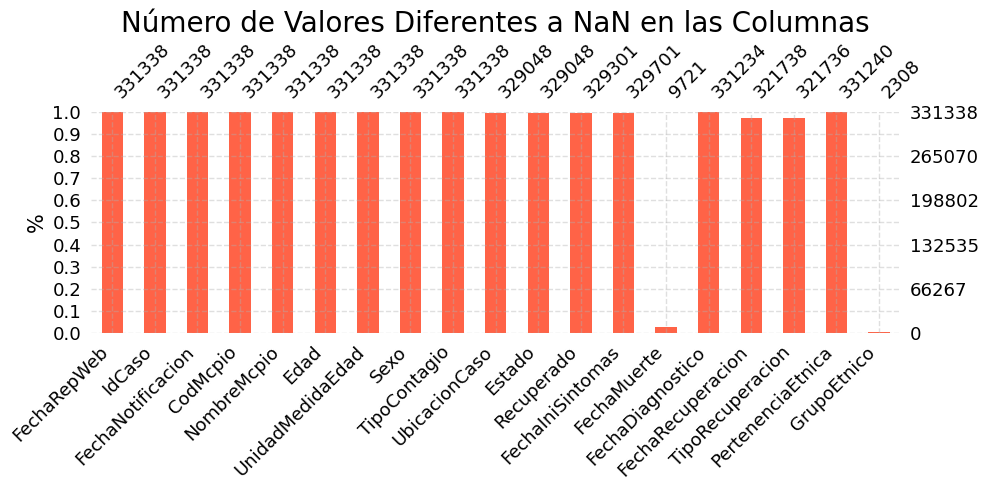

In [11]:
# Visualizamos los valores no NaN de cada una de las columnas del dataframe
nanfig,nanax=plt.subplots(tight_layout=True,figsize=(10,5))
msno.bar(covidCmarca,color="tomato",fontsize=13,ax=nanax)
nanax.grid(True,alpha=0.4,linestyle="--",linewidth=1)
nanax.set_yticks(np.arange(0,1.1,0.1))
nanax.set_title("Número de Valores Diferentes a NaN en las Columnas",fontsize=20)
nanax.set_ylabel("%",fontsize=15)
plt.show()

Como se puede obseervar en la gráfica de arriba, para la columna *fechaMuerte*, tiene un total de 9721 valores no nulos, lo cual nos permite concluir que en el departamento de Cundinamarca, desde el 28 de marzo de 2020 hasta el 17 de enero de 2024, de 331338 pacientes infectados con Covid-19, un total de 9721 muerieron.

Ahora exportamos el dataframe actualizado en formato csv.

In [12]:
covidCmarca.to_csv('../Transferencia/csv_files/CasosPositivosCOVID19Cdmrca20240314Actzdo.csv')

##### 1.3 Análisis Género
¿Cuál es el género que se vio más afectado?  

Definimos el dataframe genero, agrupando los datos por el atributo sexo y creamos el atributo FrecAbs, como el conteo de las instancias M y F.

In [13]:
# Creación de la tabla genero y cálculo de la frecuencia absoluta.
genero = covidCmarca.groupby('Sexo')['Sexo'].agg(FrecAbs='count').reset_index()
display(genero)

,Sexo,FrecAbs
0,F,177177
1,M,154161


- Tabla de frecuencia de la variable género

In [14]:
# Cálculo del tamaño de la muestra.
n = covidCmarca['Sexo'].count()
print(f"El tamaño de la muestra es: {n} personas")

El tamaño de la muestra es: 331338 personas


In [15]:
# Cálculo de la frecuencia absoluta relativa
genero["FrecAbsRel"] = genero["FrecAbs"]/n
np.sum(genero["FrecAbsRel"])

# Cálculo de frecuencia acumulada absoluta
genero["FrecAcumAbs"] = np.array([np.sum(genero["FrecAbs"].iloc[:i].values) for i in range(1,len(genero.axes[0])+1)])

# Cálculo de frecuencia relativa acumulada
genero["FrecRelAcum"] = genero["FrecAcumAbs"] / n

# Cálculo de procentaje de frecuencia
genero["%Frecuencia"] = genero["FrecRelAcum"] * 100

print("Tabla de Frecuencias de Género")
display(genero)

Tabla de Frecuencias de Género


,Sexo,FrecAbs,FrecAbsRel,FrecAcumAbs,FrecRelAcum,%Frecuencia
0,F,177177,0.534732,177177,0.534732,53.473191
1,M,154161,0.465268,331338,1.000000,100.000000


- Gráfica de la variable género

In [16]:
# Pie Chart
fig = px.pie(genero,
            values='FrecAbs',
            names=genero['Sexo'].map({'F':'Femenino', 'M': 'Masculino'}),
            hole=0.5,
            color_discrete_sequence = ['#2C3E50','#CACFD2'])

fig['layout'].update(title={"text" : 'Covid-19 por Género en Cundinamarca',
                            'y':0.95, 'x':0.5,
                            'xanchor': 'center', 'yanchor': 'top'})

fig.show()

Como se puede ver del análisis de género, en el departamento de Cundinamarca el género femenino fue el más afectado por el virus del Covid-19, con un porcentaje de afectación igual al 53.5%.

##### 1.4 Análisis Municipio
¿Cuál es el municipio más afectado?


De acuerdo con la página [Toda Colombia](https://www.todacolombia.com/departamentos-de-colombia/cundinamarca/municipios-division-politica.html), el departamento de Cundinamarca tiene un total de 116 municipios. Luego, el primer paso es verificar que el total de municipios que tenemos en los datos de entrada sea igual a 116.

In [17]:
# Verificamos que el total de municipios sea 116.
totMpios = covidCmarca['NombreMcpio'].unique().size
print(f"El total de municipios es: {totMpios}")

El total de municipios es: 119


Como vemos del análisis hecho arriba, para el atributo *NombreMcpio*, tenemos un total de 119 municipios, lo cual no es correcto. Esto se puede deber a que el momento de ingresar el nombre de los municipios, no se utilizó el mismo estándar, así que lo primero que hacemos es capitalizar todos los valores de la columna *NombreMcpio* y volvemos a calcular el total de municipios.

In [18]:
# Capitalizamos los valores de la columna Nombre municipio del dataframe
covidCmarca['NombreMcpio'] = covidCmarca['NombreMcpio'].str.capitalize()

# Verificamos que el total de municipios sea 116.
totMpios = covidCmarca['NombreMcpio'].unique().size
print(f"El total de municipios es: {totMpios}")

El total de municipios es: 116


Como vemos, ahora el valor total de municipios es de 116, que es es el valor esperado.  
Ahora, agrupamos los datos por *NombreMcpio*, calculamos la frecuencia de cada municipio y ordenamos los datos por frecuencia y en orden descendente.

In [19]:
# Buscamos cuál es el municipio afectado por el Covid-19
mpioAfectado= covidCmarca.groupby('NombreMcpio')['NombreMcpio'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()

print('Número de afectados por municipio, ordenados de mayor a menor')
display(mpioAfectado)

Número de afectados por municipio, ordenados de mayor a menor


,NombreMcpio,Frecuencia
0,Soacha,63138
1,Chia,32055
2,Zipaquira,26205
3,Cajica,20209
4,Fusagasuga,19098
...,...,...
111,El peñon,44
112,Jerusalen,32
113,Puli,30
114,Villagomez,27


De acuerdo con la tabla obtenida, podemos ver que el municipio que estuvo más afectado por el Covid-19, fue el municipio de **Soacha**, con un total de $63138$ personas infectadas.

##### 1.5 Total de Fallecidos en Soacha
Para calcular cuantas personas fallecieron, primero capitalizamos los valores de la columna *Recuperado*, para garantizar que todos tienen la misma estructura de texto y luego calculamos la frecuencia con que se encuentra cada uno de los tres valores esperados en la columna. Por último, seleccionamos los datos correspondientes el municipio de Soacha, que son los datos de análisis en este punto.

In [20]:
# Capitalizamos los valores de la columna Recuperado del dataframe
covidCmarca['Recuperado'] = covidCmarca['Recuperado'].str.capitalize()

# Agrupamos por la columna Recuperado
estado= covidCmarca.groupby('Recuperado')['Recuperado'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(estado)


,Recuperado,Frecuencia
0,Recuperado,321736
1,Fallecido,7431
2,Activo,134


Seleccionamos al muncipio de Soacha

In [21]:
# Seleccionamos la información perteneciente a Soacha
soachaDf = covidCmarca[covidCmarca['NombreMcpio']=='Soacha'].reset_index(drop=True)

# Verificamos las propiedades de nuestro nuevo data frame
display(soachaDf.info())
display(soachaDf.head(5))
display(soachaDf.describe())
tamaño = soachaDf.shape
totalReg = soachaDf.size
print(f"La matriz de datos tiene un tamaño de: {tamaño}. Para un total de {totalReg} registros")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63138 entries, 0 to 63137
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FechaRepWeb        63138 non-null  datetime64[ns]
 1   IdCaso             63138 non-null  int64         
 2   FechaNotificacion  63138 non-null  datetime64[ns]
 3   CodMcpio           63138 non-null  int64         
 4   NombreMcpio        63138 non-null  object        
 5   Edad               63138 non-null  int64         
 6   UnidadMedidaEdad   63138 non-null  int64         
 7   Sexo               63138 non-null  object        
 8   TipoContagio       63138 non-null  object        
 9   UbicacionCaso      62744 non-null  object        
 10  Estado             62744 non-null  object        
 11  Recuperado         62794 non-null  object        
 12  FechaIniSintomas   62835 non-null  datetime64[ns]
 13  FechaMuerte        1965 non-null   datetime64[ns]
 14  FechaD

None

,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico
0,2020-09-23,781892,2020-09-11,25754,Soacha,25,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN
1,2020-09-23,781864,2020-09-11,25754,Soacha,82,1,M,Comunitaria,Fallecido,Fallecido,Fallecido,2020-09-07,2020-09-28,2020-09-22,NaT,NaN,6.0,NaN
2,2020-09-23,781865,2020-09-11,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN
3,2020-09-23,781866,2020-09-11,25754,Soacha,3,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN
4,2020-07-18,186918,2020-06-30,25754,Soacha,20,1,M,Comunitaria,Casa,Leve,Recuperado,2020-06-26,NaT,2020-07-11,2020-07-26,Tiempo,6.0,NaN


,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,Edad,UnidadMedidaEdad,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,PertenenciaEtnica
count,63138,6.313800e+04,63138,63138.0,63138.000000,63138.000000,62835,1965,63101,61196,63124.000000
mean,2021-04-30 06:31:52.382400,3.091705e+06,2021-04-17 21:01:03.289936384,25754.0,37.651715,1.010216,2021-04-14 11:12:34.375746304,2021-04-19 16:21:15.114503936,2021-04-24 13:52:57.020966656,2021-05-10 08:56:16.220668160,5.954962
min,2020-03-16 00:00:00,5.100000e+01,2020-03-15 00:00:00,25754.0,1.000000,1.000000,2020-03-11 00:00:00,2020-04-17 00:00:00,2020-03-16 00:00:00,2020-03-28 00:00:00,1.000000
25%,2020-12-22 00:00:00,1.521105e+06,2020-12-11 00:00:00,25754.0,26.000000,1.000000,2020-12-10 00:00:00,2020-12-20 00:00:00,2020-12-18 00:00:00,2021-01-08 00:00:00,6.000000
50%,2021-05-26 00:00:00,3.272342e+06,2021-05-14 00:00:00,25754.0,36.000000,1.000000,2021-05-10 00:00:00,2021-05-05 00:00:00,2021-05-20 00:00:00,2021-06-01 00:00:00,6.000000
75%,2021-07-10 00:00:00,4.484812e+06,2021-06-26 00:00:00,25754.0,49.000000,1.000000,2021-06-22 00:00:00,2021-06-23 00:00:00,2021-07-04 00:00:00,2021-07-17 00:00:00,6.000000
max,2024-01-17 00:00:00,6.389765e+06,2024-01-12 00:00:00,25754.0,106.000000,4.000000,2024-01-10 00:00:00,2023-12-03 00:00:00,2024-01-11 00:00:00,2024-01-17 00:00:00,6.000000
std,NaN,1.816817e+06,NaN,0.0,17.005540,0.107558,NaN,NaN,NaN,NaN,0.444769


La matriz de datos tiene un tamaño de: (63138, 19). Para un total de 1199622 registros


Ahora, para encontrar cuál es el número de personas fallecidas, agrupamos los datos por la columna *Recuperado* y contamos la frecuencia con que se repite cada uno de sus valores esperados.

In [22]:
# Agrupamos por la columna Recuperado para saber el número de pacientes
estado= soachaDf.groupby('Recuperado')['Recuperado'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(estado)


,Recuperado,Frecuencia
0,Recuperado,61196
1,Fallecido,1571
2,Activo,27


In [23]:
# Grafica de barras para la variable Recuperado.
fig_bars = px.bar(estado, x='Frecuencia', y='Recuperado', text='Frecuencia',
                    title='Estatus Covid-19 en el Municipio de Soacha',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=False)
fig_bars.update_yaxes(visible=True, categoryorder='total ascending')
fig_bars.update_layout(height=400,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

Del análisis hecho, vemos que el total de personas fallecidas en el municipio de Soacha, por el Covid-19 es de 1571.

##### 1.6 Análisis de Distribución de Edad de los Afectados
De acuerdo con el análisis inicial de los metadatos, sabemos que se tiene una propiedad llamada unidada de medida (UnidadDeMedida), la cual toma valores de 1 cuando la edad está en años (año >= 1); 2 cuando la edad esta en meses (1 a 11 meses) y 3 cuando la edad es en días (1 a 30 días). 

Por lo tanto, primero comprobamos que efectivamente existan solo tres valores distintos para la unidad de tiempo y calculamos la frecuencia con que se repiten dentro de los datos.

In [24]:
# Agrupamos por la columna UnidadMedidaEdad (ume) para saber el rango de edad de los pacientes, según la unidad de medida
ume= soachaDf.groupby('UnidadMedidaEdad')['UnidadMedidaEdad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(ume)

,UnidadMedidaEdad,Frecuencia
0,1,62538
1,2,556
2,3,43
3,4,1


De la tabla obtenida, podemos ver que tenemos un "outlier" con valor 4. Ya que, la población de afectados por Covid-19, esta compuesta por 63138 personas, eliminar ese valor anómalo no afectará nuestros resultados.

In [25]:
# Buscamos la posición del outlier dentro del dataframe
outlier = 4
resultado = soachaDf[soachaDf['UnidadMedidaEdad']==outlier]
print("El outlier se encuentra en la siguiente posición del dataframe soachaDf")
display(resultado)

El outlier se encuentra en la siguiente posición del dataframe soachaDf


,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico
54175,2023-06-14,6370336,2023-05-31,25754,Soacha,9,4,M,Comunitaria,Casa,Leve,Recuperado,2023-05-16,NaT,2023-05-31,2023-06-21,Tiempo,6.0,NaN


Como ya conocemos el índice en el cual se encuentra el valor anómalo buscado, el siguiente paso es eliminarlo de nuestro dataframe.

In [26]:
# Removemos la fila que tiene el valor anómalo usando el índice, para este caso es: 54175
soachaDf.drop([54175], axis=0, inplace=True)

# Verificamos que el valor anómalo haya sido removido
ume= soachaDf.groupby('UnidadMedidaEdad')['UnidadMedidaEdad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(ume)


,UnidadMedidaEdad,Frecuencia
0,1,62538
1,2,556
2,3,43


Como vemos, el valor anómalo ha sido removido de nuestro dataframe soachaDf.

Por otro lado, vemos que la unidad predominante son los años, es decir, la población más afectada por el Covid-19, es la población mayor o igual a un año, pero antes de determinar la forma de analizar los datos en conjunto, podemos hacer un EDA para cada caso.

##### Análisis de la variable Años
Seleccionamos los datos con unidadMedidaEdad = 1

In [27]:
# Seleccionamos la información perteneciente a ume = 1
soachaDfAgnos = soachaDf[soachaDf['UnidadMedidaEdad']==1].reset_index(drop=True)
soachaDfAgnos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62538 entries, 0 to 62537
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FechaRepWeb        62538 non-null  datetime64[ns]
 1   IdCaso             62538 non-null  int64         
 2   FechaNotificacion  62538 non-null  datetime64[ns]
 3   CodMcpio           62538 non-null  int64         
 4   NombreMcpio        62538 non-null  object        
 5   Edad               62538 non-null  int64         
 6   UnidadMedidaEdad   62538 non-null  int64         
 7   Sexo               62538 non-null  object        
 8   TipoContagio       62538 non-null  object        
 9   UbicacionCaso      62150 non-null  object        
 10  Estado             62150 non-null  object        
 11  Recuperado         62199 non-null  object        
 12  FechaIniSintomas   62238 non-null  datetime64[ns]
 13  FechaMuerte        1959 non-null   datetime64[ns]
 14  FechaD

In [28]:
edadAgnos= soachaDfAgnos.groupby('Edad')['Edad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(edadAgnos)


,Edad,Frecuencia
0,29,1643
1,28,1638
2,31,1621
3,30,1601
4,32,1593
...,...,...
98,97,3
99,99,2
100,106,2
101,103,1


In [29]:
# Grafica de barras para la variable Edad, pero filtrada por años.
fig_bars = px.bar(edadAgnos, x='Edad', y='Frecuencia', text='Edad',
                    title='Estatus Covid-19 en el Municipio de Soacha Por Clasificación Edad en Años',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=True)
fig_bars.update_yaxes(visible=True)
fig_bars.update_layout(height=600,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

Del análisis podemos ver que la edad de los pacientes más afectados por Covid-19 en el municipio de Soacha, está entre los 21 y 45 años. Sin embargo, para la edad de 1 año, se ve un pico en la gráfica, lo cual llama la atención.

Ahora, hacemos el análisis para la edad comprendida entre 1 y 11 meses.

In [30]:
# Seleccionamos la información perteneciente a ume = 2
soachaDfMeses = soachaDf[soachaDf['UnidadMedidaEdad']==2].reset_index(drop=True)

edadMeses= soachaDfMeses.groupby('Edad')['Edad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(edadMeses)


,Edad,Frecuencia
0,1,70
1,6,62
2,5,61
3,8,56
4,2,54
5,4,51
6,7,49
7,9,42
8,3,41
9,11,37


In [31]:
# Grafica de barras para la variable Edad, pero filtrada por años.
fig_bars = px.bar(edadMeses, x='Edad', y='Frecuencia', text='Frecuencia',
                    title='Estatus Covid-19 en el Municipio de Soacha Por Clasificación Edad en Meses',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=True)
fig_bars.update_yaxes(visible=True)
fig_bars.update_layout(height=600,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

In [32]:
# Seleccionamos la información perteneciente a ume = 3
soachaDfDias = soachaDf[soachaDf['UnidadMedidaEdad']==3].reset_index(drop=True)

edadDias= soachaDfDias.groupby('Edad')['Edad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(edadDias)

,Edad,Frecuencia
0,19,4
1,25,4
2,5,3
3,6,3
4,26,3
5,21,3
6,24,2
7,7,2
8,8,2
9,12,2


In [33]:
# Grafica de barras para la variable Edad, pero filtrada por años.
fig_bars = px.bar(edadDias, x='Edad', y='Frecuencia', text='Frecuencia',
                    title='Estatus Covid-19 en el Municipio de Soacha Por Clasificación Edad en Días',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=True)
fig_bars.update_yaxes(visible=True)
fig_bars.update_layout(height=600,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

De acuerdo con los datos y las gráficas obtenidas, en la gráfica de barras para edad en años, para una edad igual a uno, hay una distribución alta de afectados por Covid-19, y teniendo en cuenta esa anomalía, a la edad comprendia entre 0 días y 11 meses de edad, la vamos a llevar a un valor de edad 0, de modo que la edad para menores de 1 año será 0 años. Esto nos permite ver mejor, de manera global, el comportamiento de la enfermedad con respecto a la edad.

In [34]:
# Hago una copia del dataframe por seguridad
soachaDfNew = soachaDf.copy()

In [35]:
# Función para actualizar la UnidadMedidaEdad en el dataframe
def updateAge(x):
    if x == 1:
        return x*1
    else:
        return x*0

In [36]:
'''
Creamos una columna temporal para almacenar los valores 1 o 0, de acuerdo con la unidad de medida
Aplicamos la función definida arriba mediante una función lambda, usando el método pandas.DataFrame.apply
Esta es la forma más eficiente, ya que evalua fila por fila el dataframe.
'''
soachaDfNew['temp'] = soachaDfNew['UnidadMedidaEdad'].apply(lambda x: updateAge(x))
soachaDfNew

,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico,temp
0,2020-09-23,781892,2020-09-11,25754,Soacha,25,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,1
1,2020-09-23,781864,2020-09-11,25754,Soacha,82,1,M,Comunitaria,Fallecido,Fallecido,Fallecido,2020-09-07,2020-09-28,2020-09-22,NaT,NaN,6.0,NaN,1
2,2020-09-23,781865,2020-09-11,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,1
3,2020-09-23,781866,2020-09-11,25754,Soacha,3,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,1
4,2020-07-18,186918,2020-06-30,25754,Soacha,20,1,M,Comunitaria,Casa,Leve,Recuperado,2020-06-26,NaT,2020-07-11,2020-07-26,Tiempo,6.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63133,2021-09-18,4937958,2021-08-08,25754,Soacha,52,1,M,Relacionado,Casa,Leve,Recuperado,2021-08-04,NaT,2021-08-19,2021-09-19,Tiempo,6.0,NaN,1
63134,2022-01-03,5183817,2021-12-20,25754,Soacha,52,1,M,Comunitaria,casa,leve,Recuperado,2021-12-16,NaT,2021-12-31,2022-01-04,Tiempo,6.0,NaN,1
63135,2022-01-25,5764944,2022-01-13,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2022-01-09,NaT,2022-01-24,2022-01-27,Tiempo,6.0,NaN,1
63136,2021-09-10,4926306,2021-09-08,25754,Soacha,68,1,M,Comunitaria,Casa,Leve,Recuperado,2021-08-30,NaT,2021-09-09,2021-09-13,Tiempo,6.0,NaN,1


In [37]:
# Ahora podemos crear la nueva columna EdadAgnos la cual es la multiplicacion de Edad * temp
soachaDfNew['EdadAgnos'] = soachaDfNew['Edad'] * soachaDfNew['temp']

# Eliminamos la columna temporal temp
soachaDfNew = soachaDfNew.drop('temp', axis=1)

soachaDfNew.head()

,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico,EdadAgnos
0,2020-09-23,781892,2020-09-11,25754,Soacha,25,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,25
1,2020-09-23,781864,2020-09-11,25754,Soacha,82,1,M,Comunitaria,Fallecido,Fallecido,Fallecido,2020-09-07,2020-09-28,2020-09-22,NaT,NaN,6.0,NaN,82
2,2020-09-23,781865,2020-09-11,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,69
3,2020-09-23,781866,2020-09-11,25754,Soacha,3,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,3
4,2020-07-18,186918,2020-06-30,25754,Soacha,20,1,M,Comunitaria,Casa,Leve,Recuperado,2020-06-26,NaT,2020-07-11,2020-07-26,Tiempo,6.0,NaN,20


In [38]:
edadSoacha = soachaDfNew.groupby('EdadAgnos')['EdadAgnos'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(edadSoacha)

,EdadAgnos,Frecuencia
0,29,1643
1,28,1638
2,31,1621
3,30,1601
4,32,1593
...,...,...
99,97,3
100,99,2
101,106,2
102,103,1


In [39]:
# Grafica de barras para la variable Edad, pero filtrada por años.
fig_bars = px.bar(edadSoacha, x='EdadAgnos', y='Frecuencia', text='EdadAgnos',
                    title='Edad Afectados Covid-19 en el Municipio de Soacha',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=True)
fig_bars.update_yaxes(visible=True)
fig_bars.update_layout(height=600,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13),
                            xaxis_title='Edad en Años')

##### Distribución de Edad de los Afectados

- Cálculo del tamaño de la muestra y de valores máximo y mínimo.

In [133]:
# Cálculo del tamaño de la muestra n
n = soachaDfNew['EdadAgnos'].count()

# Valor mínimo
minVal = soachaDfNew['EdadAgnos'].min()

# Valor máximo
maxVal = soachaDfNew['EdadAgnos'].max()

print(f"Tamaño de la muestra n = {n} personas")
print(f"Mínimo min = {minVal} años")
print(f"Máximo max = {maxVal} años")

Tamaño de la muestra n = 63137 personas
Mínimo min = 0 años
Máximo max = 106 años


- Cálculo de intervalo y amplitud de clase

In [134]:
intClase = np.round(1 + 3.3 * math.log10(n))
ampClase = np.around(((maxVal - minVal)/intClase), decimals=1)
ampClase = math.modf(ampClase)[1] + 1

print(f"Intervalo de clase = {intClase}")
print(f"Amplitud de clase = {ampClase}")

Intervalo de clase = 17.0
Amplitud de clase = 7.0


- Generación tabla de frecuencias

In [135]:
# Creamos la tabla de frecuencias
tablaFrecuencias = pd.DataFrame(columns=["LimInf", "LimSup", "FrecAbs"])

limites = np.arange(minVal, maxVal + ampClase, ampClase) # Sumamos la amplitud, solo para tener mas valores de los esperados
limInf = limites[:int(intClase)-1]
limSup = limites[1:int(intClase)+1]

In [136]:
display(limites)

array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
        77.,  84.,  91.,  98., 105., 112.])

Generación de intervalos.

In [137]:
print("Intervalo Inferior")
display(limInf)
print("\nIntervalo Superior")
display(limSup)

Intervalo Inferior


array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
        77.,  84.,  91.,  98., 105.])


Intervalo Superior


array([  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,  77.,
        84.,  91.,  98., 105., 112.])

In [138]:
tablaFrecuencias['LimInf'] = limInf
tablaFrecuencias['LimSup'] = limSup
tablaFrecuencias['FrecAbs'] = np.array([np.sum((soachaDfNew['EdadAgnos'] >= limInf[n]) & (soachaDfNew['EdadAgnos'] < limSup[n])) for n in range(limInf.size)]) # [LimInf - LimSup)
tablaFrecuencias

,LimInf,LimSup,FrecAbs
0,0.0,7.0,2203
1,7.0,14.0,2188
2,14.0,21.0,4066
3,21.0,28.0,9656
4,28.0,35.0,11223
5,35.0,42.0,10364
6,42.0,49.0,7419
7,49.0,56.0,5974
8,56.0,63.0,4648
9,63.0,70.0,2782


In [139]:
# QC
print(f"La suma de las frecuencias absolutas es igual al tamaño de la muestra: {np.sum(tablaFrecuencias['FrecAbs']) == n}")

La suma de las frecuencias absolutas es igual al tamaño de la muestra: True


In [140]:
# Calculamos la frecuencia relativa
tablaFrecuencias['FrecAbsRel'] = tablaFrecuencias['FrecAbs'] / n

# QC frecuencia relativa
print(f"La suma de la frecuencia relativa es: {np.sum(tablaFrecuencias['FrecAbsRel'])}")

La suma de la frecuencia relativa es: 1.0


In [141]:
tablaFrecuencias['FrecAcumAbs'] = np.array([np.sum(tablaFrecuencias['FrecAbs'].iloc[:n].values) for n in range(1, int(intClase))])
tablaFrecuencias

,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs
0,0.0,7.0,2203,0.034892,2203
1,7.0,14.0,2188,0.034655,4391
2,14.0,21.0,4066,0.064400,8457
3,21.0,28.0,9656,0.152937,18113
4,28.0,35.0,11223,0.177756,29336
5,35.0,42.0,10364,0.164151,39700
6,42.0,49.0,7419,0.117506,47119
7,49.0,56.0,5974,0.094620,53093
8,56.0,63.0,4648,0.073618,57741
9,63.0,70.0,2782,0.044063,60523


In [142]:
tablaFrecuencias['FreqAcumRel'] = tablaFrecuencias['FrecAcumAbs'] / n
tablaFrecuencias

,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs,FreqAcumRel
0,0.0,7.0,2203,0.034892,2203,0.034892
1,7.0,14.0,2188,0.034655,4391,0.069547
2,14.0,21.0,4066,0.064400,8457,0.133947
3,21.0,28.0,9656,0.152937,18113,0.286884
4,28.0,35.0,11223,0.177756,29336,0.464640
5,35.0,42.0,10364,0.164151,39700,0.628791
6,42.0,49.0,7419,0.117506,47119,0.746298
7,49.0,56.0,5974,0.094620,53093,0.840917
8,56.0,63.0,4648,0.073618,57741,0.914535
9,63.0,70.0,2782,0.044063,60523,0.958598


##### Histograma

In [143]:
fig = px.bar(tablaFrecuencias, x="LimInf", y="FrecAbs",
            color_discrete_sequence=['#b20710'],
            text_auto=True)
            
# Personaliza el gráfico
fig.update_layout(title="Histograma Edad Afectados Covid-19 Municipio de Soacha",
                xaxis_title="Intervalo de Clases",
                yaxis_title="Frecuencia absoluta",
                height=800,
                hovermode='y unified',
                title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'))

fig.update_xaxes(tickvals=tablaFrecuencias["LimInf"],
                ticktext=[f"{tablaFrecuencias['LimInf'][i]} - {tablaFrecuencias['LimSup'][i]}" for i in range(tablaFrecuencias.shape[0])],
                tickangle=90)

# Permite definir el ancho de las barras
fig.update_traces(width=[tablaFrecuencias["LimSup"][i] - tablaFrecuencias["LimInf"][i] for i in range(tablaFrecuencias.shape[0])])

# Muestra el gráfico
fig.show()

##### Medidas de Tendencia Central

In [144]:
# Cálculo del Promedio
tablaFrecuencias['marcaClase'] = (tablaFrecuencias['LimInf']+tablaFrecuencias['LimSup'])/2


print('\n-----------------------Medidas de Tendencia Central-----------------------\n')
promedio = np.sum(tablaFrecuencias['FrecAbs']*tablaFrecuencias['marcaClase'])/(soachaDfNew['EdadAgnos'].count())
print(f"Promedio = {promedio}\n")

# Cálculo Mediana

'''
Ojo: La mediana se puede calcular de manera fácil con NumPy usando el código:
np.median(soachaDfNew['EdadAgnos'])
Sin embargo, el siguiente código es un algoritmo para calcularla teniendo en cuenta
la definición de mediana
'''

valOrdenados = soachaDfNew['EdadAgnos'].sort_values()
valOrdenadosArray = valOrdenados.values
mediana = np.mean([valOrdenadosArray[(valOrdenadosArray.size)/2-1],
                valOrdenadosArray[(valOrdenadosArray.size)/2]]) if valOrdenadosArray.size % 2 == 0 else valOrdenadosArray[(valOrdenadosArray.size//2)-1]
print(f"mediana = {mediana}\n")


# Cálculo de la moda
freq = np.unique(valOrdenadosArray, return_counts=True)
freq = [(freq[0][i], freq[1][i]) for i,_ in enumerate(freq[0])] # Ordena en tuplas (edad, freq)

moda = max(freq, key=lambda x: x[1])

print(f"moda = {moda[0]}. Valor repetido {moda[1]} veces dentro del dataset.")

display(tablaFrecuencias)



-----------------------Medidas de Tendencia Central-----------------------

Promedio = 38.135015917766125

mediana = 36

moda = 29. Valor repetido 1643 veces dentro del dataset.


,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs,FreqAcumRel,marcaClase
0,0.0,7.0,2203,0.034892,2203,0.034892,3.5
1,7.0,14.0,2188,0.034655,4391,0.069547,10.5
2,14.0,21.0,4066,0.064400,8457,0.133947,17.5
3,21.0,28.0,9656,0.152937,18113,0.286884,24.5
4,28.0,35.0,11223,0.177756,29336,0.464640,31.5
5,35.0,42.0,10364,0.164151,39700,0.628791,38.5
6,42.0,49.0,7419,0.117506,47119,0.746298,45.5
7,49.0,56.0,5974,0.094620,53093,0.840917,52.5
8,56.0,63.0,4648,0.073618,57741,0.914535,59.5
9,63.0,70.0,2782,0.044063,60523,0.958598,66.5


##### Medidas de Dispersión

In [145]:
# Cálculo de Varianza

tablaFrecuencias['marca-media'] = tablaFrecuencias['marcaClase']-promedio
tablaFrecuencias['marca-media-cuadrado'] = tablaFrecuencias['marca-media']**2
varianza = np.sum(tablaFrecuencias['marca-media-cuadrado']) / n

# Cálculo Desviación Estándar

desviacionEstandar = math.sqrt(varianza)

# Cálculo de el Coeficiente de Variación

coeficientVariacion = round((desviacionEstandar / promedio) * 100, 2)

print('\n-----------------------Medidas de Dispersión-----------------------\n')
print(f"varianza = {varianza}\n")
print(f"desviación estándar = {desviacionEstandar}\n")
print(f"coeficiente de variación = {coeficientVariacion}%\n")


-----------------------Medidas de Dispersión-----------------------

varianza = 0.3447506612625801

desviación estándar = 0.5871547166314685

coeficiente de variación = 1.54%



#### 2. Municipios más afectados
2.1  ¿Cuáles son los cinco (5) municipios más afectados? Realice tabla de frecuencia y gráfico.

In [148]:
# Buscamos cuáles son los 5 municipios más afectados.
cincoMpioMasAfect = covidCmarca.groupby('NombreMcpio')['NombreMcpio'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index().head(5)
print("Cinco Municipios más Afectados:")
display(cincoMpioMasAfect)


Cinco Municipios más Afectados:


,NombreMcpio,Frecuencia
0,Soacha,63138
1,Chia,32055
2,Zipaquira,26205
3,Cajica,20209
4,Fusagasuga,19098


In [149]:
# Creamos el dataframe con los cinco municipios más afectados
cincoMcpios = covidCmarca[covidCmarca.NombreMcpio.isin(['Soacha','Chia','Zipaquira','Cajica','Fusagasuga'])].reset_index(drop=True)

In [158]:
# Cálculo del tamaño de la muestra.
n = cincoMcpios['NombreMcpio'].count()
print(f"El tamaño de la muestra es: {n} personas\n")
# Cálculo de la frecuencia absoluta relativa
cincoMpioMasAfect["FrecAbsRel"] = cincoMpioMasAfect["Frecuencia"]/n
#np.sum(cincoMpioMasAfect["FrecAbsRel"])

# Cálculo de frecuencia acumulada absoluta
cincoMpioMasAfect["FrecAcumAbs"] = np.array([np.sum(cincoMpioMasAfect["Frecuencia"].iloc[:i].values) for i in range(1,len(cincoMpioMasAfect.axes[0])+1)])

# Cálculo de frecuencia relativa acumulada
cincoMpioMasAfect["FrecRelAcum"] = cincoMpioMasAfect["FrecAcumAbs"] / n

# Cálculo de procentaje de frecuencia
cincoMpioMasAfect["%Frecuencia"] = cincoMpioMasAfect["FrecRelAcum"] * 100

print("Tabla de Frecuencias de Población")
display(cincoMpioMasAfect)

El tamaño de la muestra es: 160705 personas

Tabla de Frecuencias de Población


,NombreMcpio,Frecuencia,FrecAbsRel,FrecAcumAbs,FrecRelAcum,%Frecuencia
0,Soacha,63138,0.392881,63138,0.392881,39.288137
1,Chia,32055,0.199465,95193,0.592346,59.234622
2,Zipaquira,26205,0.163063,121398,0.755409,75.540898
3,Cajica,20209,0.125752,141607,0.881161,88.116113
4,Fusagasuga,19098,0.118839,160705,1.000000,100.000000


In [159]:
fig = px.pie(cincoMpioMasAfect,
            values='Frecuencia',
            names=cincoMpioMasAfect['NombreMcpio'],
            hole=0.5,
            color_discrete_sequence= px.colors.sequential.thermal)

fig['layout'].update(title={"text" : 'Distribución de Población Infectada por Covid-19 en los 5 Municipios de Cundinamarca más Afectados por el Vírus',
                        'y':0.95, 'x':0.5,
                        'xanchor': 'center', 'yanchor': 'top'},
                        title_font=dict(size=20, color='#35363a', family='Lato, sans-serif'),
                        height=500)

fig.show()

In [160]:
fig_bars = px.bar(cincoMpioMasAfect, x='Frecuencia', y='NombreMcpio', text='Frecuencia',
                    color='Frecuencia',
                    title='Distribución de Población Infectada por Covid-19 en los 5 Municipios de Cundinamarca más Afectados por el Vírus',
                    #color_discrete_sequence=['#b20710']
                    color_continuous_scale= px.colors.sequential.RdBu)
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=False)
fig_bars.update_yaxes(visible=True, categoryorder='total ascending')
fig_bars.update_layout(height=400,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=19, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

2.2 ¿Cuál es el género más afectado?

In [161]:
# Creación de la tabla genero y cálculo de la frecuencia absoluta.
genero = cincoMcpios.groupby('Sexo')['Sexo'].agg(Frecuencia='count').reset_index()
display(genero)

,Sexo,Frecuencia
0,F,88197
1,M,72508


Del análisis, vemos que el género más afectado de la población total de los cinco municipios es el género femenino, con un total de 88197 mujeres infectadas por el vírus.

2.3 ¿Cuál es el municipio con mayor cantidad de hombres infectados? 

In [162]:
# Seleccionamos del dataframe la columna Sexo con el valor M, y creamos la tabla con dos columnas NombreMcpio y Sexo
totalHombres = cincoMcpios.loc[cincoMcpios['Sexo'] == 'M', ['NombreMcpio', 'Sexo']]

# Calculo de cantidad de hombres infectados por municipio
tblHombresMcpio = totalHombres.groupby('NombreMcpio')['NombreMcpio'].agg(TotalHombres='count').sort_values(by='TotalHombres', ascending=False).reset_index()
display(tblHombresMcpio)

,NombreMcpio,TotalHombres
0,Soacha,27718
1,Chia,14317
2,Zipaquira,12207
3,Cajica,9329
4,Fusagasuga,8937


In [163]:
fig_bars = px.bar(tblHombresMcpio, x='TotalHombres', y='NombreMcpio', text='TotalHombres',
                    color='TotalHombres',
                    title='Total Hombres Infectados por Covid-19 en los 5 Municipios de Cundinamarca más Afectados por el Vírus',
                    color_continuous_scale= px.colors.sequential.RdBu)
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=False)
fig_bars.update_yaxes(visible=True, categoryorder='total ascending')
fig_bars.update_layout(height=400,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=19, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13))

Del análisis realizado, vemos que el municipio con mayor cantidad de hombres infectados es Soacha, con un total de 27218 hombres.

2.4 ¿Cuál es la distribución de la edad de los cinco (5) municipios? Realice tabla de frecuencia y
gráfico.

In [156]:
# Esto es solo un QC que necesito
display(cincoMpioMasAfect)

,NombreMcpio,Frecuencia,FrecAbsRel,FrecAcumAbs,FrecRelAcum,%Frecuencia
0,Soacha,63138,0.392881,63138,0.392881,39.288137
1,Chia,32055,0.199465,95193,0.592346,59.234622
2,Zipaquira,26205,0.163063,121398,0.755409,75.540898
3,Cajica,20209,0.125752,141607,0.881161,88.116113
4,Fusagasuga,19098,0.118839,160705,1.000000,100.000000


In [164]:
# Agrupamos por la columna UnidadMedidaEdad (ume) para saber el rango de edad de los pacientes, según la unidad de medida
ume = cincoMcpios.groupby('UnidadMedidaEdad')['UnidadMedidaEdad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(ume)

,UnidadMedidaEdad,Frecuencia
0,1,159749
1,2,877
2,3,78
3,4,1


In [165]:
# Buscamos la posición del outlier dentro del dataframe
outlier = 4
resultado = cincoMcpios[cincoMcpios['UnidadMedidaEdad']==outlier]
print("El outlier se encuentra en la siguiente posición del dataframe soachaDf")
display(resultado)

El outlier se encuentra en la siguiente posición del dataframe soachaDf


,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico
131045,2023-06-14,6370336,2023-05-31,25754,Soacha,9,4,M,Comunitaria,Casa,Leve,Recuperado,2023-05-16,NaT,2023-05-31,2023-06-21,Tiempo,6.0,NaN


In [166]:
# Removemos la fila que tiene el valor anómalo usando el índice, para este caso es: 54175
cincoMcpios.drop([131045], axis=0, inplace=True)

# Verificamos que el valor anómalo haya sido removido
ume= cincoMcpios.groupby('UnidadMedidaEdad')['UnidadMedidaEdad'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(ume)

,UnidadMedidaEdad,Frecuencia
0,1,159749
1,2,877
2,3,78


Nuevamente observamos que la unidad predominante son los años, por lo que vamos a llevar la edad comprendida entre 0 días y 11 meses a un valor de edad de 0, aplicando la función `updateAge(x)`.

In [167]:
cincoMcpios['temp'] = cincoMcpios['UnidadMedidaEdad'].apply(lambda x: updateAge(x))
display(cincoMcpios.head(5))

,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico,temp
0,2020-11-08,1137426,2020-10-31,25290,Fusagasuga,38,1,F,Relacionado,Casa,Leve,Recuperado,2020-10-31,NaT,2020-11-07,2021-03-22,PCR,6.0,NaN,1
1,2020-07-18,186939,2020-06-30,25175,Chia,86,1,F,Comunitaria,Casa,Leve,Recuperado,2020-06-26,NaT,2020-07-11,2020-07-26,PCR,6.0,NaN,1
2,2020-09-23,781892,2020-09-11,25754,Soacha,25,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,1
3,2020-09-23,781864,2020-09-11,25754,Soacha,82,1,M,Comunitaria,Fallecido,Fallecido,Fallecido,2020-09-07,2020-09-28,2020-09-22,NaT,NaN,6.0,NaN,1
4,2020-09-23,781865,2020-09-11,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,1


In [168]:
# Ahora podemos crear la nueva columna EdadAgnos la cual es la multiplicacion de Edad * temp
cincoMcpios['EdadAgnos'] = cincoMcpios['Edad'] * cincoMcpios['temp']

# Eliminamos la columna temporal temp
cincoMcpios = cincoMcpios.drop('temp', axis=1)

cincoMcpios.head(5)

,FechaRepWeb,IdCaso,FechaNotificacion,CodMcpio,NombreMcpio,Edad,UnidadMedidaEdad,Sexo,TipoContagio,UbicacionCaso,Estado,Recuperado,FechaIniSintomas,FechaMuerte,FechaDiagnostico,FechaRecuperacion,TipoRecuperacion,PertenenciaEtnica,GrupoEtnico,EdadAgnos
0,2020-11-08,1137426,2020-10-31,25290,Fusagasuga,38,1,F,Relacionado,Casa,Leve,Recuperado,2020-10-31,NaT,2020-11-07,2021-03-22,PCR,6.0,NaN,38
1,2020-07-18,186939,2020-06-30,25175,Chia,86,1,F,Comunitaria,Casa,Leve,Recuperado,2020-06-26,NaT,2020-07-11,2020-07-26,PCR,6.0,NaN,86
2,2020-09-23,781892,2020-09-11,25754,Soacha,25,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,25
3,2020-09-23,781864,2020-09-11,25754,Soacha,82,1,M,Comunitaria,Fallecido,Fallecido,Fallecido,2020-09-07,2020-09-28,2020-09-22,NaT,NaN,6.0,NaN,82
4,2020-09-23,781865,2020-09-11,25754,Soacha,69,1,F,Comunitaria,Casa,Leve,Recuperado,2020-09-07,NaT,2020-09-22,2020-09-27,Tiempo,6.0,NaN,69


In [169]:
edadCincoMcpios = cincoMcpios.groupby('EdadAgnos')['EdadAgnos'].agg(Frecuencia='count').sort_values(by='Frecuencia', ascending=False).reset_index()
display(edadCincoMcpios)

,EdadAgnos,Frecuencia
0,30,3782
1,29,3761
2,28,3705
3,31,3704
4,32,3690
...,...,...
102,101,4
103,104,4
104,106,2
105,105,1


In [170]:
# Grafica de barras para la variable Edad, pero filtrada por años.
fig_bars = px.bar(edadCincoMcpios, x='EdadAgnos', y='Frecuencia', text='Frecuencia',
                    title='Edad Afectados Covid-19',
                    color_discrete_sequence=['#b20710'])
fig_bars.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bars.update_xaxes(visible=True)
fig_bars.update_yaxes(visible=True)
fig_bars.update_layout(height=600,
                            margin=dict(t=100, b=20, l=70, r=40),
                            hovermode='y unified',
                            title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'),
                            font=dict(color='#35363a', size=13),
                            xaxis_title='Edad en Años')

- Cálculo del tamaño de la muestra y de valores máximo y mínimo.

In [171]:
# Cálculo del tamaño de la muestra n
n = cincoMcpios['EdadAgnos'].count()

# Valor mínimo
minVal = cincoMcpios['EdadAgnos'].min()

# Valor máximo
maxVal = cincoMcpios['EdadAgnos'].max()

print(f"Tamaño de la muestra n = {n} personas")
print(f"Mínimo min = {minVal} años")
print(f"Máximo max = {maxVal} años")

Tamaño de la muestra n = 160704 personas
Mínimo min = 0 años
Máximo max = 107 años


- Cálculo de intervalo y amplitud de clase

In [172]:
intClase = np.round(1 + 3.3 * math.log10(n))
ampClase = np.around(((maxVal - minVal)/intClase), decimals=1)
ampClase = math.modf(ampClase)[1] + 1

print(f"Intervalo de clase = {intClase}")
print(f"Amplitud de clase = {ampClase}")

Intervalo de clase = 18.0
Amplitud de clase = 6.0


- Generación tabla de frecuencias

In [173]:
# Creamos la tabla de frecuencias
tablaFrecuencias = pd.DataFrame(columns=["LimInf", "LimSup", "FrecAbs"])

limites = np.arange(minVal, maxVal + ampClase, ampClase)
limInf = limites[:int(intClase)]
limSup = limites[1:int(intClase)+1]
display(limites)

array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
        66.,  72.,  78.,  84.,  90.,  96., 102., 108.])

- Generación Intervalos

In [174]:
print("Intervalo Inferior")
display(limInf)
print("\nIntervalo Superior")
display(limSup)

Intervalo Inferior


array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
        66.,  72.,  78.,  84.,  90.,  96., 102.])


Intervalo Superior


array([  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,  66.,
        72.,  78.,  84.,  90.,  96., 102., 108.])

In [175]:
tablaFrecuencias['LimInf'] = limInf
tablaFrecuencias['LimSup'] = limSup
tablaFrecuencias['FrecAbs'] = np.array([np.sum((cincoMcpios['EdadAgnos'] >= limInf[n]) & (cincoMcpios['EdadAgnos'] < limSup[n])) for n in range(limInf.size)]) # [LimInf - LimSup)
tablaFrecuencias

,LimInf,LimSup,FrecAbs
0,0.0,6.0,4112
1,6.0,12.0,4498
2,12.0,18.0,7010
3,18.0,24.0,15578
4,24.0,30.0,21800
5,30.0,36.0,21756
6,36.0,42.0,21071
7,42.0,48.0,17016
8,48.0,54.0,14196
9,54.0,60.0,11779


In [176]:
# QC
print(f"La suma de las frecuencias absolutas es igual al tamaño de la muestra: {np.sum(tablaFrecuencias['FrecAbs']) == n}")

La suma de las frecuencias absolutas es igual al tamaño de la muestra: True


In [177]:
# Calculamos la frecuencia relativa
tablaFrecuencias['FrecAbsRel'] = tablaFrecuencias['FrecAbs'] / n

# QC frecuencia relativa
print(f"La suma de la frecuencia relativa es: {np.sum(tablaFrecuencias['FrecAbsRel'])}")

La suma de la frecuencia relativa es: 1.0


In [178]:
tablaFrecuencias['FrecAcumAbs'] = np.array([np.sum(tablaFrecuencias['FrecAbs'].iloc[:n].values) for n in range(1, int(intClase)+1)])
tablaFrecuencias

,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs
0,0.0,6.0,4112,0.025587,4112
1,6.0,12.0,4498,0.027989,8610
2,12.0,18.0,7010,0.043621,15620
3,18.0,24.0,15578,0.096936,31198
4,24.0,30.0,21800,0.135653,52998
5,30.0,36.0,21756,0.135379,74754
6,36.0,42.0,21071,0.131117,95825
7,42.0,48.0,17016,0.105884,112841
8,48.0,54.0,14196,0.088336,127037
9,54.0,60.0,11779,0.073296,138816


In [179]:
tablaFrecuencias['FreqAcumRel'] = tablaFrecuencias['FrecAcumAbs'] / n
tablaFrecuencias

,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs,FreqAcumRel
0,0.0,6.0,4112,0.025587,4112,0.025587
1,6.0,12.0,4498,0.027989,8610,0.053577
2,12.0,18.0,7010,0.043621,15620,0.097197
3,18.0,24.0,15578,0.096936,31198,0.194133
4,24.0,30.0,21800,0.135653,52998,0.329786
5,30.0,36.0,21756,0.135379,74754,0.465166
6,36.0,42.0,21071,0.131117,95825,0.596283
7,42.0,48.0,17016,0.105884,112841,0.702167
8,48.0,54.0,14196,0.088336,127037,0.790503
9,54.0,60.0,11779,0.073296,138816,0.863799


- Histograma

In [180]:
fig = px.bar(tablaFrecuencias, x="LimInf", y="FrecAbs",
            color_discrete_sequence=['#b20710'],
            text_auto=True)
            
# Personaliza el gráfico
fig.update_layout(title="Histograma Edad Afectados Covid-19",
                xaxis_title="Intervalo de Clases",
                yaxis_title="Frecuencia absoluta",
                height=800,
                hovermode='y unified',
                title_font=dict(size=25, color='#35363a', family='Lato, sans-serif'))

fig.update_xaxes(tickvals=tablaFrecuencias["LimInf"],
                ticktext=[f"{tablaFrecuencias['LimInf'][i]} - {tablaFrecuencias['LimSup'][i]}" for i in range(tablaFrecuencias.shape[0])],
                tickangle=90)

# Permite definir el ancho de las barras
fig.update_traces(width=[tablaFrecuencias["LimSup"][i] - tablaFrecuencias["LimInf"][i] for i in range(tablaFrecuencias.shape[0])])

# Muestra el gráfico
fig.show()

- Medidas de Tendencia Central

In [183]:
# Cálculo del Promedio
tablaFrecuencias['marcaClase'] = (tablaFrecuencias['LimInf']+tablaFrecuencias['LimSup'])/2


print('\n-----------------------Medidas de Tendencia Central-----------------------\n')
promedio = np.sum(tablaFrecuencias['FrecAbs']*tablaFrecuencias['marcaClase'])/(cincoMcpios['EdadAgnos'].count())
print(f"Promedio = {promedio}\n")

# Cálculo Mediana

mediana = np.median(cincoMcpios['EdadAgnos'])
print(f"mediana = {mediana}\n")


# Cálculo de la moda
valOrdenados = cincoMcpios['EdadAgnos'].sort_values()
valOrdenadosArray = valOrdenados.values

freq = np.unique(valOrdenadosArray, return_counts=True)
freq = [(freq[0][i], freq[1][i]) for i,_ in enumerate(freq[0])] # Ordena en tuplas (edad, freq)

moda = max(freq, key=lambda x: x[1])

print(f"moda = {moda[0]}. Valor repetido {moda[1]} veces dentro del dataset.")
display(tablaFrecuencias)



-----------------------Medidas de Tendencia Central-----------------------

Promedio = 39.314068100358426

mediana = 37.0

moda = 30. Valor repetido 3782 veces dentro del dataset.


,LimInf,LimSup,FrecAbs,FrecAbsRel,FrecAcumAbs,FreqAcumRel,marcaClase
0,0.0,6.0,4112,0.025587,4112,0.025587,3.0
1,6.0,12.0,4498,0.027989,8610,0.053577,9.0
2,12.0,18.0,7010,0.043621,15620,0.097197,15.0
3,18.0,24.0,15578,0.096936,31198,0.194133,21.0
4,24.0,30.0,21800,0.135653,52998,0.329786,27.0
5,30.0,36.0,21756,0.135379,74754,0.465166,33.0
6,36.0,42.0,21071,0.131117,95825,0.596283,39.0
7,42.0,48.0,17016,0.105884,112841,0.702167,45.0
8,48.0,54.0,14196,0.088336,127037,0.790503,51.0
9,54.0,60.0,11779,0.073296,138816,0.863799,57.0


- Medidas de Dispersión

In [184]:
# Cálculo de Varianza

tablaFrecuencias['marca-media'] = tablaFrecuencias['marcaClase']-promedio
tablaFrecuencias['marca-media-cuadrado'] = tablaFrecuencias['marca-media']**2
varianza = np.sum(tablaFrecuencias['marca-media-cuadrado']) / n

# Cálculo Desviación Estándar

desviacionEstandar = math.sqrt(varianza)

# Cálculo de el Coeficiente de Variación

coeficientVariacion = round((desviacionEstandar / promedio) * 100, 2)

print('\n-----------------------Medidas de Dispersión-----------------------\n')
print(f"varianza = {varianza}\n")
print(f"desviación estándar = {desviacionEstandar}\n")
print(f"coeficiente de variación = {coeficientVariacion}%\n")


-----------------------Medidas de Dispersión-----------------------

varianza = 0.13269227103056785

desviación estándar = 0.36426950329470054

coeficiente de variación = 0.93%



##### Observaciones
Los datos utilizados en este trabajo, fueron descargados de la página web: [Vista Casos Positivos COVID-19 Cundinamarca](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Vista-Casos-Positivos-COVID-19-Cundinamarca/rik9-88u9/about_data).

El análisis de los metadatos y la identificación de variables relevantes fueron pasos importantes para evitar errores en la interpretación de los datos. Una vez identificadas las variables pertinentes para los objetivos del estudio se examinó la cantidad de datos, así como la presencia de valores nulos en cada columna. Los datos abarcan desde el 8 de marzo de 2020 hasta el 17 de enero de 2024, con un total de 331338 registros.

Durante este período, las mujeres fueron más afectadas por el virus en el departamento de Cundinamarca, representando el 53.5% de los infectados, en comparación con el 46.5% de hombres.

El municipio de Soacha registró el mayor número de casos, con 63138 personas infectadas y 7431 fallecidos.

Al analizar la edad, se encontraron tres clasificaciones numéricas: "1" para personas mayores de un año, "2" para infantes de entre uno y once meses, y "3" para neonatos de uno a 30 días. Dado que la mayoría de los datos representan edades en años, se asignó el valor de cero a las edades entre un día y once meses, facilitando así la visualización global del comportamiento de la enfermedad en función de la edad en años.

Para el municipio de Soacha, la edad promedio de los infectados fue de 38.1 años, con una mediana de 36 años y una moda de 29 años. El histograma reveló que los niños y adolescentes de 0 a 14 años fueron más afectados que los adultos mayores de 70 años. La baja dispersión en los datos se reflejó en una varianza de 0.344 y un coeficiente de variación del 1.54%.

Los cinco municipios más afectados por COVID-19 fueron Soacha, Chía, Zipaquirá, Cajicá y Fusagasugá, en ese orden, con Soacha siendo el más impactado con 63138 casos. En estos municipios, las mujeres representaron el género más afectado, con 88197 casos, mientras que, en Soacha, el municipio con más hombres infectados, se registraron 27718 casos.

Para los cinco municipios mencionados, la edad promedio de los infectados fue de 39.3 años, con una mediana de 37 años y una moda de 30 años. La dispersión en estos datos fue aún más baja, con una varianza de 0.13 y un coeficiente de variación del 0.93%.

Depués de generar la tabla de frecuencia y analizar el histograma, así como las medidas de tendencia central, encontramos que para los cinco municipios mencionados, la edad promedio de la población infectada con el vírus es de 39.3 años, con una mediana de 37 años y una moda de 30 años.

Mientras que la varianza obtenida fue de 0.13 y el coeficiente de variación tuvo un valor de 0.93%, lo cual nos indica una muy baja dispersión en los datos.